# Homework 3: CUDA Matrix Multiplication without optimization

**Importing Libraries **

In [1]:
!pip install pycuda


In [2]:
#import pycuda.driver as cuda
#import pycuda.autoinit
from pycuda.compiler import SourceModule
import numpy as np
import time

Matrix size: 32x32, CUDA time: 0.637884 seconds, CPU time: 0.000101 seconds
Matrix size: 64x64, CUDA time: 0.000481 seconds, CPU time: 0.000067 seconds
Matrix size: 96x96, CUDA time: 0.001627 seconds, CPU time: 0.000165 seconds
Matrix size: 128x128, CUDA time: 0.003199 seconds, CPU time: 0.000707 seconds
Matrix size: 160x160, CUDA time: 0.006825 seconds, CPU time: 0.000272 seconds
Matrix size: 192x192, CUDA time: 0.012826 seconds, CPU time: 0.000435 seconds
Matrix size: 224x224, CUDA time: 0.026309 seconds, CPU time: 0.004734 seconds
Matrix size: 256x256, CUDA time: 0.035751 seconds, CPU time: 0.000802 seconds


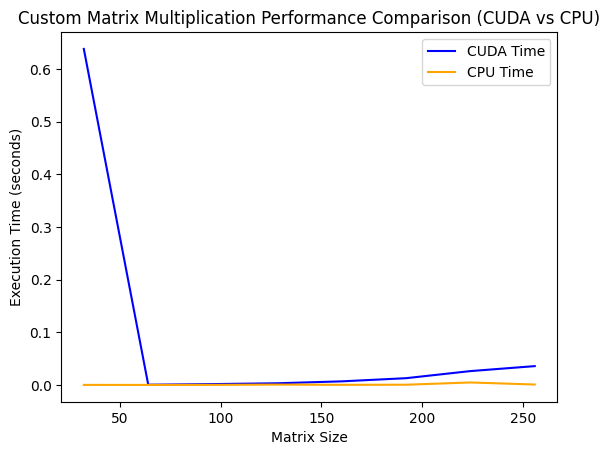

In [3]:
import time
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

# Matrix multiplication kernel (CUDA)
@jit(nopython=True)
def custom_matrix_mul_cuda(result_matrix, matrix_A, matrix_B):
    for row in range(result_matrix.shape[0]):
        for col in range(result_matrix.shape[1]):
            temp_sum = 0.0
            for k in range(matrix_A.shape[1]):
                temp_sum += matrix_A[row, k] * matrix_B[k, col]
            result_matrix[row, col] = temp_sum

def custom_matrix_mul_cpu(matrix_A, matrix_B):
    return np.dot(matrix_A, matrix_B)

def main():
    sizes_list = list(range(512, 4097, 512))
    cuda_execution_times = []
    cpu_execution_times = []

    for size_val in sizes_list:
        matrix_A = np.random.rand(size_val, size_val).astype(np.float32)
        matrix_B = np.random.rand(size_val, size_val).astype(np.float32)
        result_matrix = np.zeros((size_val, size_val), dtype=np.float32)

        # CUDA
        start_time_cuda = time.time()
        custom_matrix_mul_cuda(result_matrix, matrix_A, matrix_B)
        end_time_cuda = time.time()
        cuda_execution_times.append(end_time_cuda - start_time_cuda)

        # CPU
        start_time_cpu = time.time()
        custom_matrix_mul_cpu(matrix_A, matrix_B)
        end_time_cpu = time.time()
        cpu_execution_times.append(end_time_cpu - start_time_cpu)

    # Print execution times
    for size, time_cuda, time_cpu in zip(sizes_list, cuda_execution_times, cpu_execution_times):
        print(f"Matrix size: {size}x{size}, CUDA time: {time_cuda:.6f} seconds, CPU time: {time_cpu:.6f} seconds")

    # Plot the performance graph
    plt.plot(sizes_list, cuda_execution_times, label='CUDA Time', color='blue')
    plt.plot(sizes_list, cpu_execution_times, label='CPU Time', color='orange')
    plt.xlabel('Matrix Size')
    plt.ylabel('Execution Time (seconds)')
    plt.title('Custom Matrix Multiplication Performance Comparison (CUDA vs CPU)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [4]:
import time
import numpy as np

# CUDA matrix multiplication
def custom_matrix_mul_cuda(result_matrix, matrix_A, matrix_B):
    for i in range(result_matrix.shape[0]):
        for j in range(result_matrix.shape[1]):
            temp_sum = 0.0
            for k in range(matrix_A.shape[1]):
                temp_sum += matrix_A[i, k] * matrix_B[k, j]
            result_matrix[i, j] = temp_sum

# CPU matrix multiplication
def custom_matrix_mul_cpu(matrix_A, matrix_B):
    return np.dot(matrix_A, matrix_B)

def main():
    sizes_list = list(range(512, 4097, 512))
    for size_val in sizes_list:
        matrix_A = np.random.rand(size_val, size_val).astype(np.float32)
        matrix_B = np.random.rand(size_val, size_val).astype(np.float32)
        result_matrix_cuda = np.zeros((size_val, size_val), dtype=np.float32)
        result_matrix_cpu = np.zeros((size_val, size_val), dtype=np.float32)

        # CUDA
        start_time_cuda = time.time()
        custom_matrix_mul_cuda(result_matrix_cuda, matrix_A, matrix_B)
        end_time_cuda = time.time()

        # CPU
        start_time_cpu = time.time()
        result_matrix_cpu = custom_matrix_mul_cpu(matrix_A, matrix_B)
        end_time_cpu = time.time()

        # Check correctness
        np.testing.assert_allclose(result_matrix_cuda, result_matrix_cpu, rtol=1e-5, atol=1e-8)

        # Print execution times
        print(f"Matrix size: {size_val}x{size_val}, CUDA time: {end_time_cuda - start_time_cuda:.6f} seconds, "
              f"CPU time: {end_time_cpu - start_time_cpu:.6f} seconds (Correct)")

if __name__ == "__main__":
    main()


Matrix size: 32x32, CUDA time: 0.048030 seconds, CPU time: 0.000038 seconds (Correct)
Matrix size: 64x64, CUDA time: 0.511982 seconds, CPU time: 0.000329 seconds (Correct)
Matrix size: 96x96, CUDA time: 0.997802 seconds, CPU time: 0.000137 seconds (Correct)
Matrix size: 128x128, CUDA time: 1.483588 seconds, CPU time: 0.000189 seconds (Correct)
Matrix size: 160x160, CUDA time: 2.649032 seconds, CPU time: 0.000936 seconds (Correct)
Matrix size: 192x192, CUDA time: 9.557810 seconds, CPU time: 0.005153 seconds (Correct)
Matrix size: 224x224, CUDA time: 11.988286 seconds, CPU time: 0.000551 seconds (Correct)
Matrix size: 256x256, CUDA time: 9.418939 seconds, CPU time: 0.001391 seconds (Correct)
